In [1]:
import os
os.chdir('/home/roberto/Documents/Titulación/Tesina')

In [2]:
from scripts import *

### Países disponibles:

##### -España
##### -Alemania

### Años disponibles:

##### 2008 a 2017

Correr siguiente celda para repetir toda la simulación

In [3]:
#import multiprocessing
#from joblib import delayed, Parallel

#Parallel(n_jobs=multiprocessing.cpu_count()-3)(delayed(solar_year)(country,year) for country in paises for year in years)

Correr siguiente celda para leer archivos existentes de simulación anterior

In [4]:
import pandas as pd
todo = {}
for year in years:
    for country in paises:
        todo[country+str(year)]=pd.read_csv('../Archivos/Output/'+country+str(year)+'.csv',parse_dates=[0])
        todo[country+str(year)].set_index('time',inplace=True)

In [5]:
df = todo['Spain2011']

<AxesSubplot:xlabel='time', ylabel='Solar Power [GW]'>

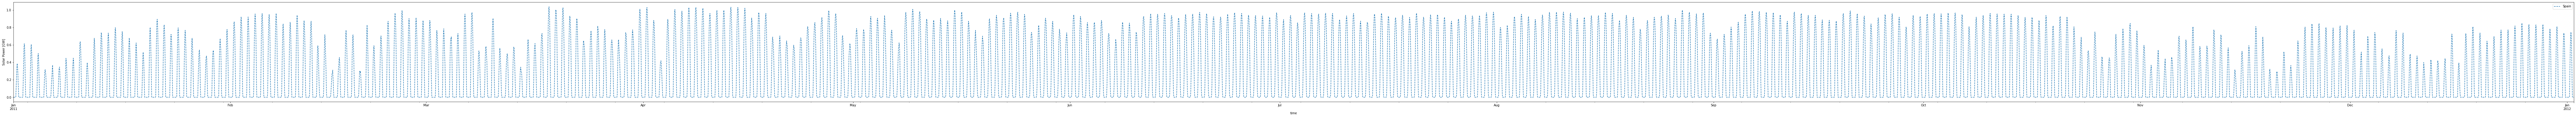

In [6]:
df.div(1e3).plot(ylabel='Solar Power [GW]', ls='--', figsize=(150, 6))

Para localizar un año de datos hay que llamar al diccionario y en la clave insertar el nombre del país y el año de interés, e.g. todo['Spain2011']

Área elegible:
Llamar la función eligible_area con argumento 'Spain' o 'Germany' y segundo argumento él uso de suelo a contemplar en el mapa

Uso de suelo disponible:
water
(34,35,39,40)

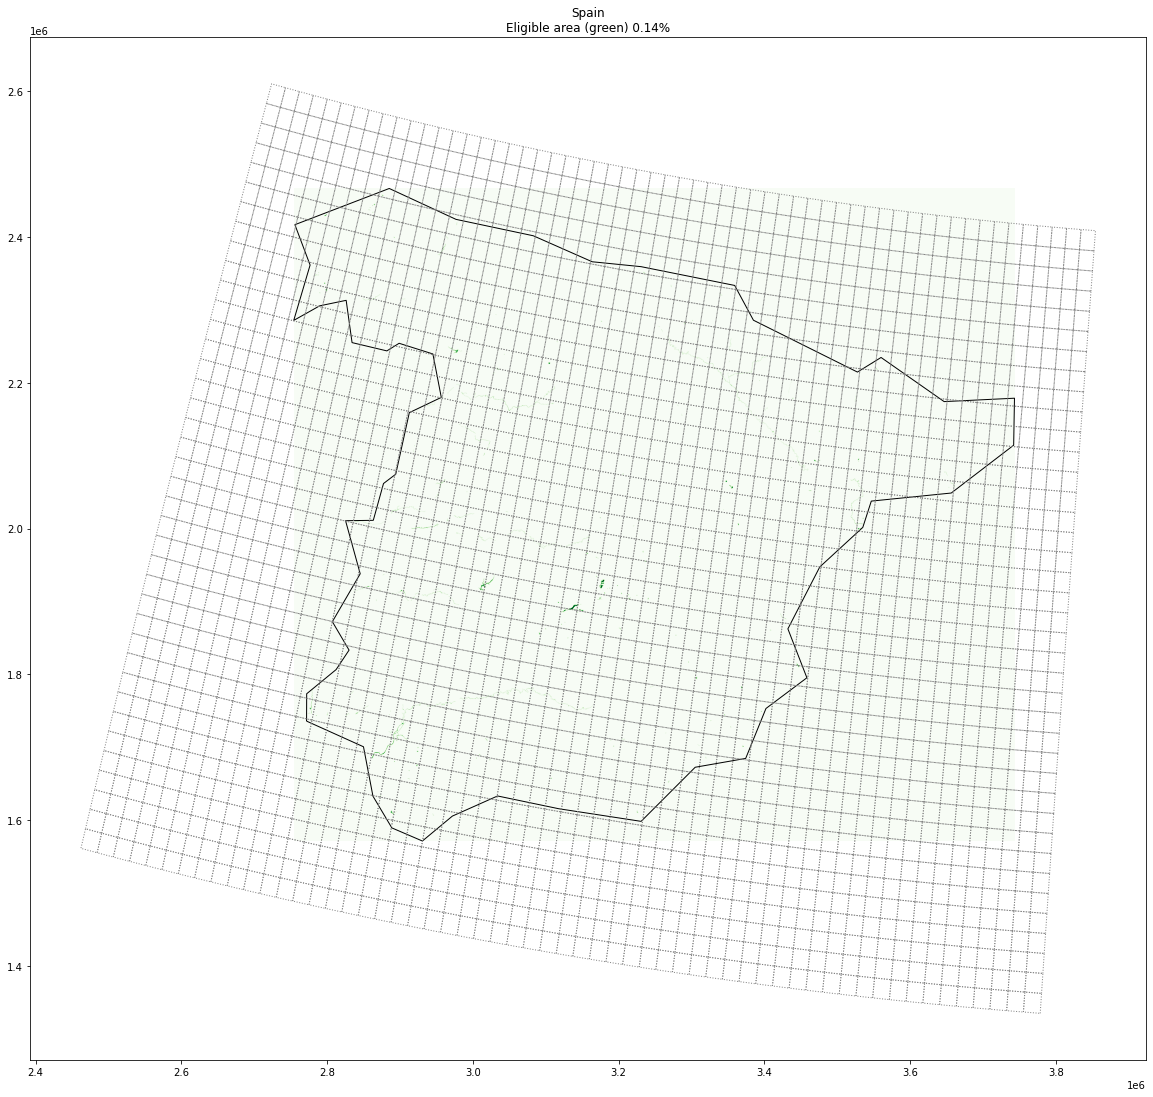

In [7]:
eligible_area('Spain',water)

In [ ]:
eligible_area('Germany',water)